# Fintech Customer Churn Analysis

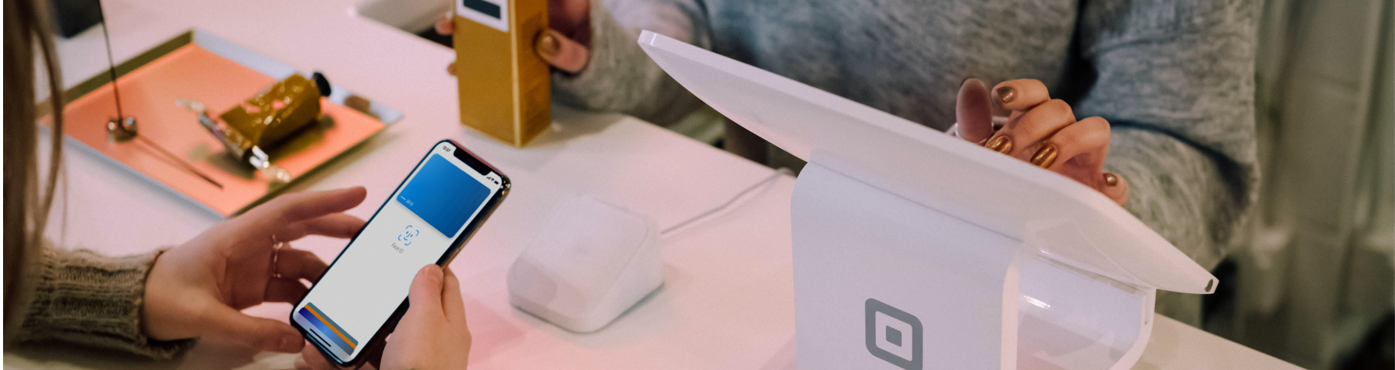

Subscription business model is a set-up where customers must pay a recurring rate for every interval to continue access to the service. Common examples for these are gym memberships, magazine subscriptions, and as-a-service digital platforms (data storage, web applications, etc). Since the businesses' main revenue-maker is the recurring subscriptions, these businesses rely highly on its customer retention and will make efforts to minimize its customer churn.

In this project, we will explore fintech customer data to identify patterns on whether consumers will cancel subscriptions based on their financial status, website/application behavior, and history with product.

## Standard Libraries

In [1]:
# Import standard libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import random

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset
df = pd.read_csv('churn_data.csv')

## Project Roadmap

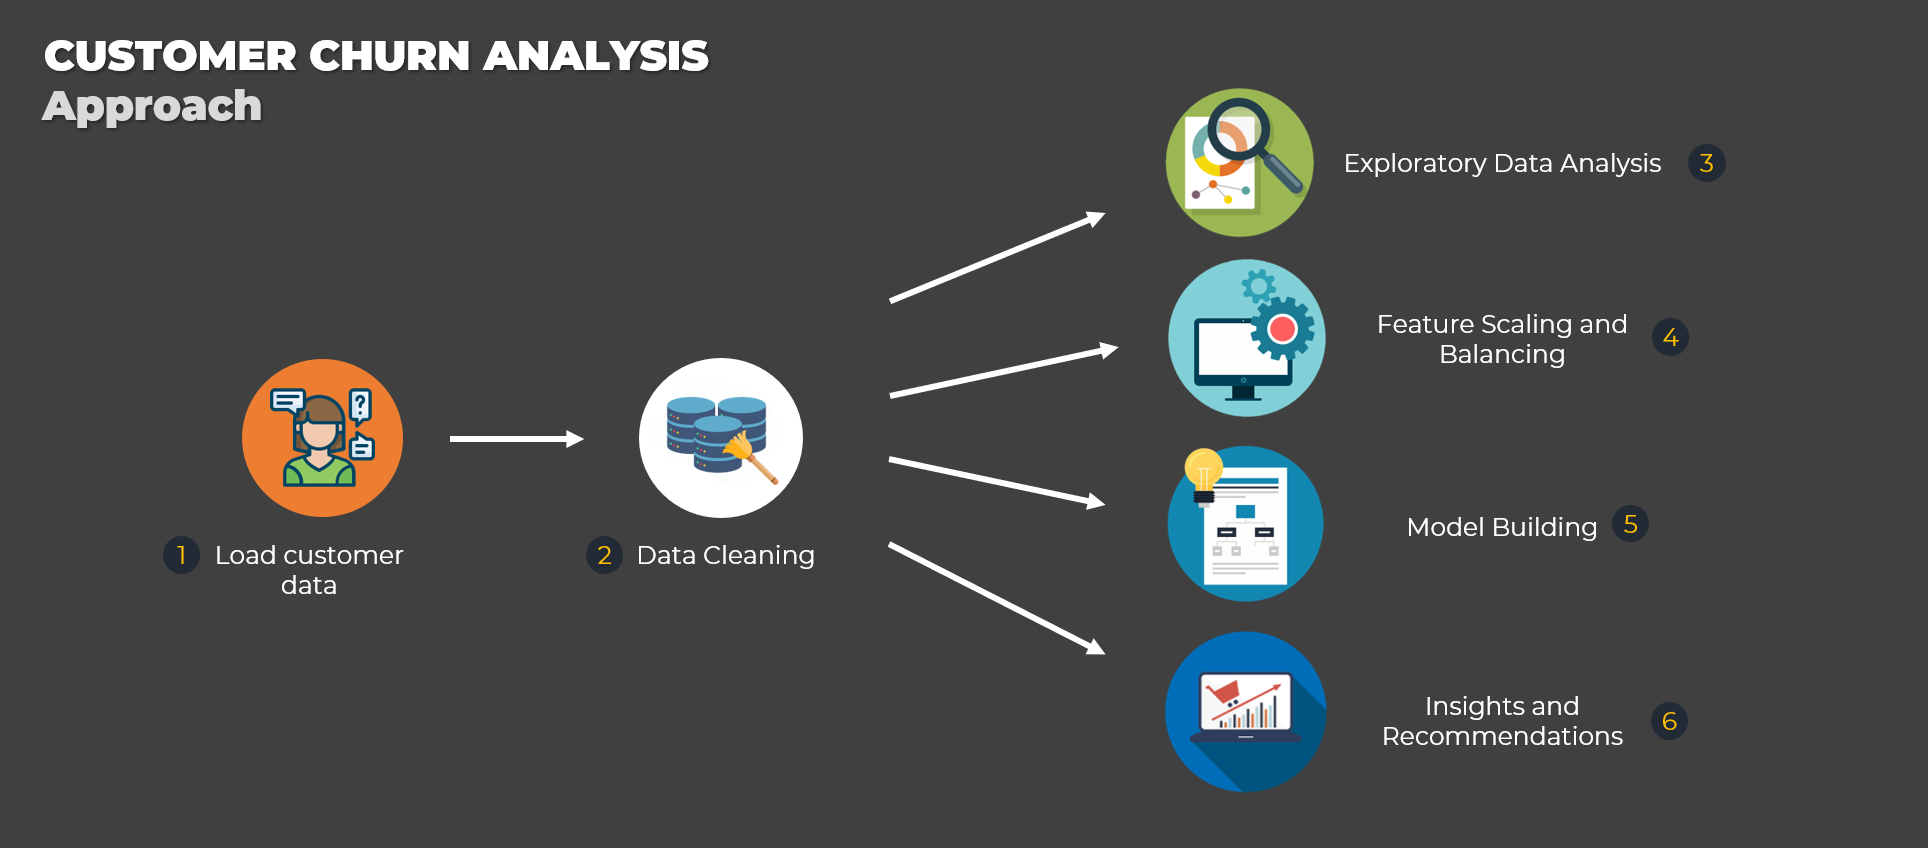

## Exploratory Data Analysis

In [3]:
df.head(5)

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [4]:
df.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [5]:
df.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


<b>Insight:</b> With churn mean of 0.411495, this means 41.15% of the users from our current database have churned.

## Data Cleaning

In [6]:
df[df.credit_score<300]

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
7347,45685,1,22.0,na,3.0,0,0,16,0,0,...,0,0,0,0,na,0,0,16.0,0.53,0
9244,33603,0,28.0,na,2.0,0,0,5,0,0,...,0,0,0,0,Aquarius,0,0,1.0,0.04,0
11978,2465,0,32.0,R,3.0,42,5,56,42,0,...,0,0,0,0,Libra,0,0,24.0,0.80,1
18857,33700,1,22.0,na,2.0,0,0,0,0,0,...,0,0,0,0,Gemini,0,0,6.0,0.20,0


In [7]:
df = df[df.credit_score>=300]

In [8]:
# Checking for Nan
df.isna().any()

user                       False
churn                      False
age                        False
housing                    False
credit_score               False
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [9]:
df.isna().sum()

user                          0
churn                         0
age                           0
housing                       0
credit_score                  0
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             1190
reward_rate                   0
is_referred                   0
dtype: i

In [10]:
# Remove Nan
df = df.drop(columns=['credit_score', 'rewards_earned'])

## Visualizing Data

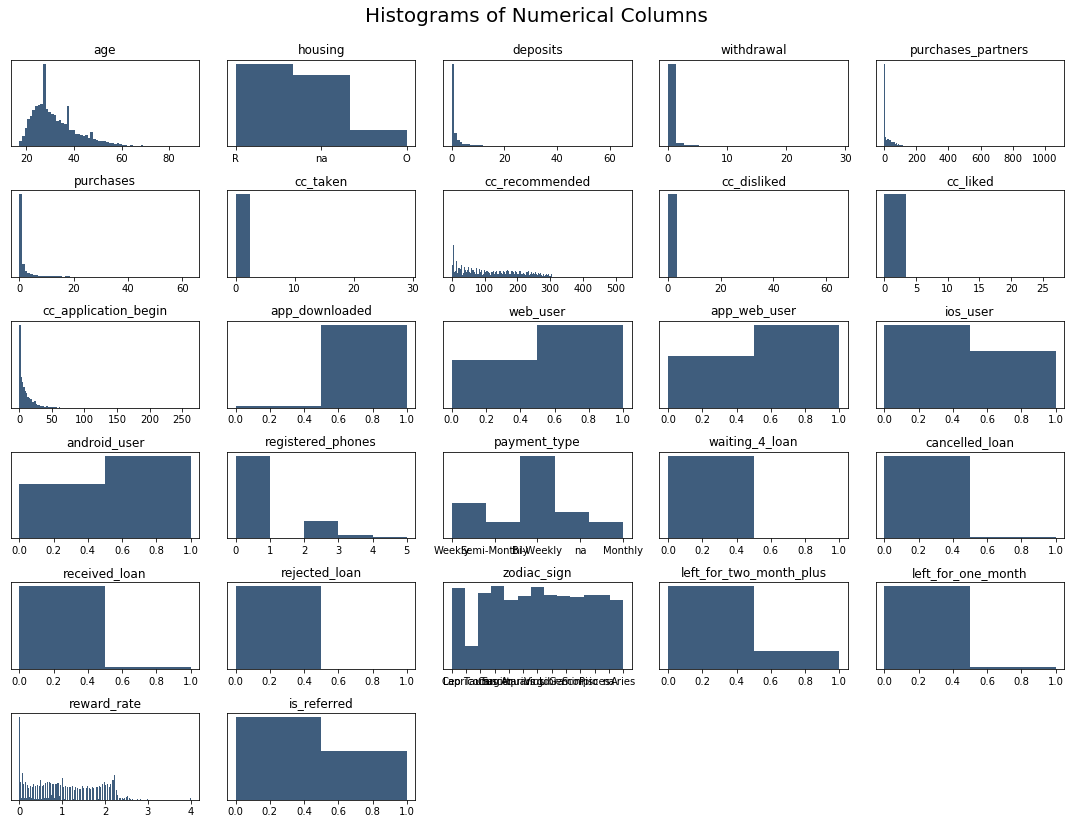

In [11]:
# Histograms
df2 = df.drop(columns = ['user', 'churn'])
fig = plt.figure(figsize=(15,12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, df2.shape[1]+1):
    plt.subplot(6,5,i)
    f=plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(df2.columns.values[i - 1])
    
    vals = np.size(df2.iloc[:,i-1].unique())
    
    plt.hist(df2.iloc[:,i-1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0,0.03,1,0.95])

From above histogram, we will focus on the categorical distributions and see below observations:

<b>Insights:</b> some notable features below:
* Age - Majority of users are between 20-35 years old and there is a lower product usage for older people.
* Housing - Most of the users are renting their current place and the rest are unclassified
* Deposits, Withdrawal, and Purchases - Majority of people have zero value or no deposits. Since we are using the first months, most of the users may still not be comfortable and will only start depositing and withdrawing more once they have trusted the service.
* Payment_type - Most users prefer a bi-weekly frequency of payment.

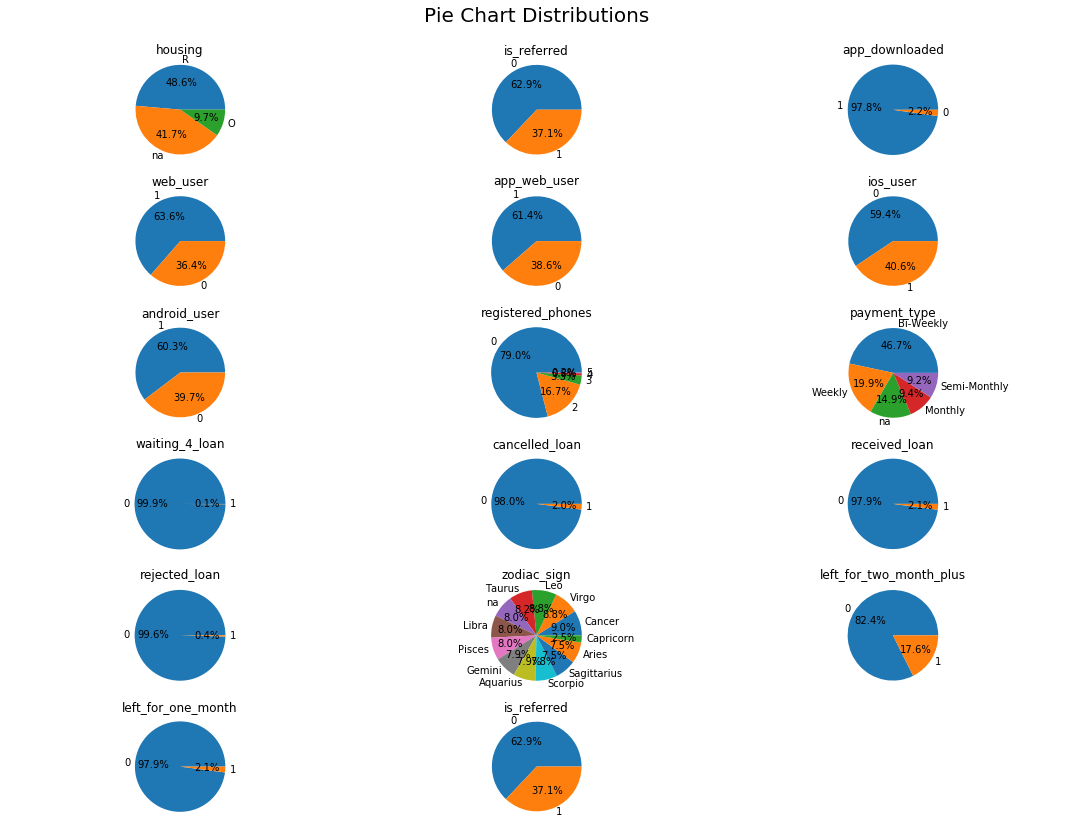

In [12]:
# Pie plots
df2 = df[['housing', 'is_referred', 'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]

fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, df2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(df2.columns.values[i - 1])
   
    values = df2.iloc[:, i - 1].value_counts(normalize = True).values
    index = df2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95]);

Above pie charts and binary colors help us ensure that neither show our distribution to be so high that the smaller set will be too small to include possible values of the response variable. For this visualization, we focused on only the binary columns in contrast to previous histograms.

<b>Insight:</b> We can see from above set of pie charts that 'waiting_4_loan' 'cancelled_loan', 'received_loan', 'rejected_loan', 'left_for_one_month' have very skewed results. These will be fields that we have to drill down further to identify if these information will be helpful for the model, as we still need to be able to get both churn and not churn response variable from each sub-class.

In [13]:
## to ensure both subsets contain both response variable
df[df2.waiting_4_loan == 1].churn.value_counts()

0    15
1     3
Name: churn, dtype: int64

In [14]:
df[df2.cancelled_loan == 1].churn.value_counts()


0    194
1    187
Name: churn, dtype: int64

In [15]:
df[df2.received_loan == 1].churn.value_counts()

1    233
0    162
Name: churn, dtype: int64

In [16]:
df[df2.rejected_loan == 1].churn.value_counts()

1    64
0    17
Name: churn, dtype: int64

In [17]:
df[df2.left_for_one_month == 1].churn.value_counts()

1    207
0    184
Name: churn, dtype: int64

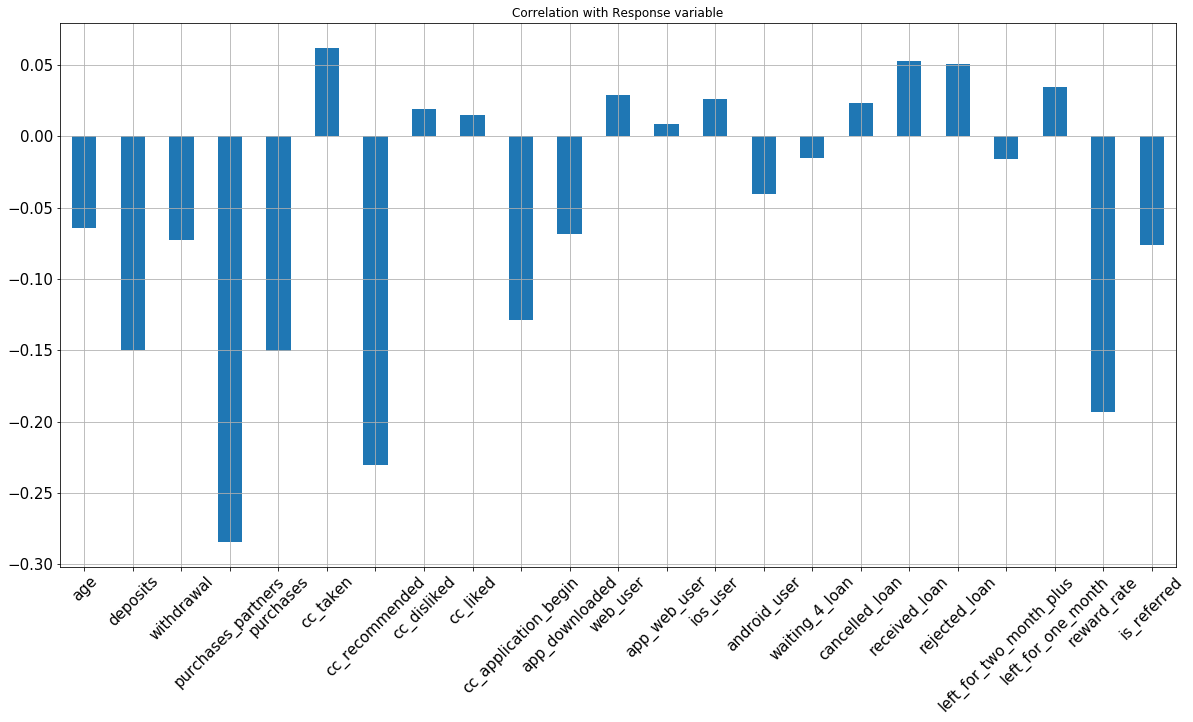

In [18]:
## Correlation with Response Variable
df.drop(columns = ['user', 'churn','housing', 'payment_type',
                         'registered_phones', 'zodiac_sign']).corrwith(df.churn).plot.bar(figsize=(20,10),
              title = 'Correlation with Response variable',
              fontsize = 15, rot = 45,
              grid = True);

<b> Correlation Plot </b> shows how each independent feature affects the response variable and what features will be important. This shows what fields are going to be stronger predictors when we build our model.

<b>Insight:</b> Based on correlation alone, we should take note of field who are above the 0.00 correlation value as these are the features related to a person going to churn, specifically cc_taken, received_loan, and rejected_loan.  Gentle reminder that correlation is not causation. It can only be observed that a user is more likely to churn if they are also involved in the mentioned fields. For cc_taken, this provides insights that users may not be very happy with the credit card feature. On the other hand, field receiving negative correlation such as purchase_partners, cc_recommended, and reward_rate, are actions or fields that we can also focus on to retain our users.

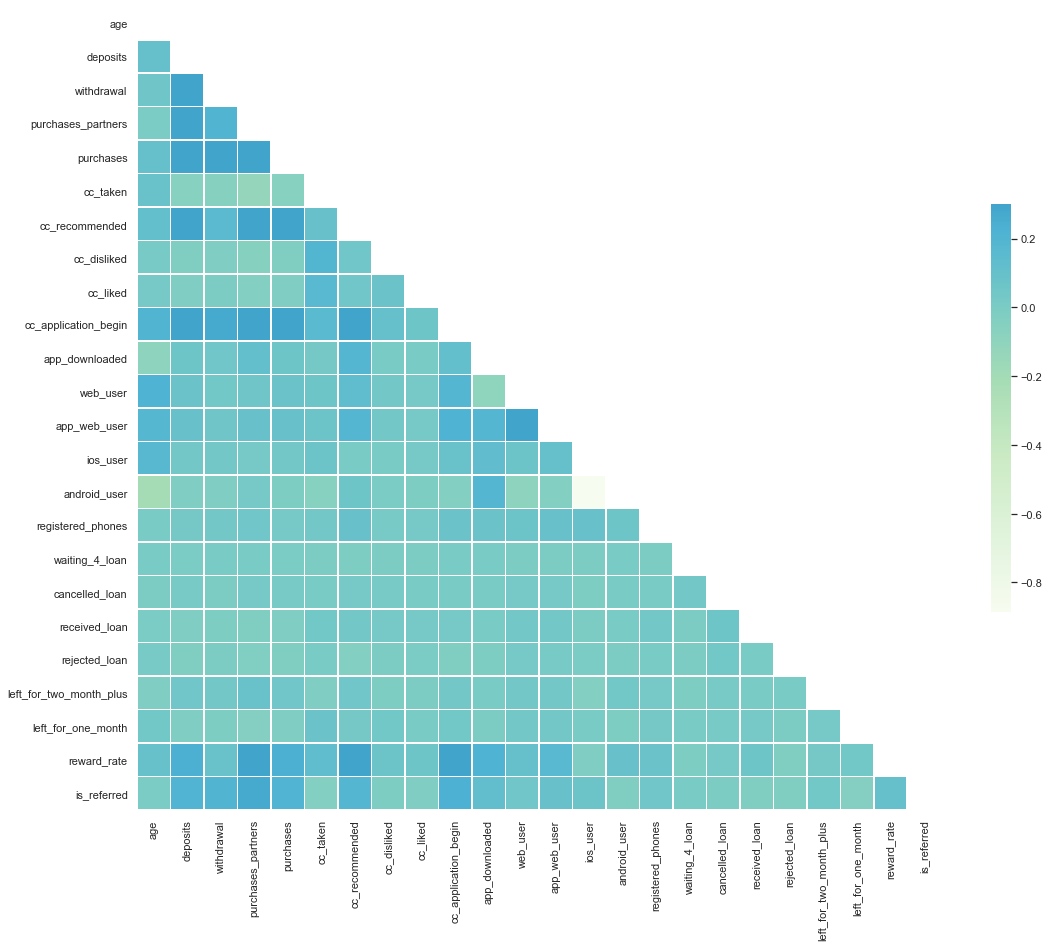

In [19]:
## Correlation Matrix
sn.set(style="white")

# Compute the correlation matrix
corr = df.drop(columns = ['user', 'churn']).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18, 15))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
sn.heatmap(corr, mask=mask, cmap='GnBu', vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

<b> Correlation Matrix </b> shows how each independent field is related to another. This helps us on the model building as we don't want any field to be dependent on one another. 

<b> Insight:</b> Strong negative correlation can be observed between android_user and ios_user as these two fields relate to an either-or relationship. From the list of the variables, it can be noted that app_web_user is a function web_user and app_downloaded, making it NOT an independent variable.

In [20]:
# Removing Correlated Fields
dataset = df.drop(columns = ['app_web_user'])

# New dataset for model building
dataset.to_csv('new_churn_data.csv', index = False)

In [21]:
dataset = pd.read_csv('new_churn_data.csv')

## Model Building - Data Preparation

In [22]:
## Data Preparation
user_identifier = dataset['user']
dataset = dataset.drop(columns = ['user'])
dataset.head(5)

,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,0,28.0,R,0,0,1,0,0,96,0,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
1,0,35.0,R,47,2,86,47,0,285,0,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
2,0,26.0,R,26,3,38,25,0,74,0,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
3,1,32.0,R,5,3,111,5,0,227,0,...,Bi-Weekly,0,0,0,0,Taurus,0,0,1.83,0
4,0,21.0,na,0,0,4,0,0,0,0,...,Bi-Weekly,0,0,0,0,Cancer,0,0,0.07,0


### One-Hot Encoding

<b>One-Hot Encoding</b> is used to convert categorical variables into their own independent binary column so the data can be understood by the model.

In [23]:
# One-Hot Encoding
dataset.housing.value_counts()
dataset.groupby('housing')['churn'].nunique().reset_index()

# Get_dummies automatically detects which ones are categorical variables and make them into their own binary codes
dataset = pd.get_dummies(dataset)
dataset.columns

# Remove nuisance fields and fields high correlation to another
dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

<b>Train-Test Split</b> is a technique used to evaluate supervised machine learning algorithm. Dataset is divided into to two sets preferrably with 70/30 or 80/20 ratio to prevent overfitting in the model performance. If you want to replicate the test again, set specific random_state.

In [24]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'), dataset['churn'], test_size = 0.2, random_state = 0)

<b>Balancing Training Set</b> guarantees the accuracy is the result of the model and not due to 0's and 1's in the response variable

In [25]:
# Balancing the Training Set
y_train.value_counts()

pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]

<b>Feature Scaling</b> normalizes all the numerical fields to fit same scale and accurate weight for the logistic regression equation

In [26]:
# Feature Scaling - Normalizing all the numerical fields to fit same scale and accurate weight for the logistic regression equation
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

# Ensure new dataframe (normalized data) has complete columns and indexes
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

# Replace original with new scaled data
X_train = X_train2
X_test = X_test2

### Model Building - Model

<b>Logistic Regression</b> is the only regression model fit for a Classification use case as it measures the probability or likelihood of each case to fall to either category (Yes or No).

In [27]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)

In [28]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)

In [29]:
print("Test Data Accuracy: %0.5f" % accuracy_score(y_test, y_pred));

Test Data Accuracy: 0.63854


In [30]:
print("Test Data Precision: %0.5f" % precision_score(y_test, y_pred)); # tp / (tp + fp)

Test Data Precision: 0.54462


In [31]:
print("Test Data Recall: %0.5f" % recall_score(y_test, y_pred)); # tp / (tp + fn)

Test Data Recall: 0.75990


In [32]:
print("Test Data F1: %0.5f" % f1_score(y_test, y_pred));

Test Data F1: 0.63450


<b>Insight:</b> Accuracy score of 64.17% is not that high but is already sufficient for this purpose and industry standard (as long as it is greater than 50%). Precision score is an important metric and, for this case, means that of all the positives predicted, 54.74% are actually true - this is not a good precision as it means for the positive cases that we predicted, only half of them were right. As for recall score, we have a good score that means we were able to predict 76.31% true cases out of all actual positives. Lastly, F1 score gives us a validation of our model performance as it combines Precision and Recall.

Test Data Accuracy: 0.6385


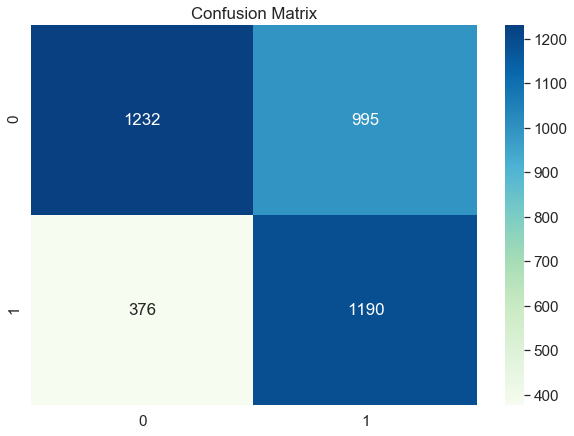

In [33]:
dataset_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(dataset_cm, annot=True, fmt='g', cmap='GnBu')
plt.title('Confusion Matrix')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred));

<b>Insight:</b> 1239 non-churn customers and 1195 churn customers were correctly predicted according to their actual behavior. On the other hand, the model predicted 988 customers as non-churn when they were in fact going to churn, causing the model to only have 54.74% precision and also means incorrect targeting of investment since more attention should have been given to these customers. However, the model only has a minimal error of 371 in terms of tagging customers as churn when they are non-churn - our model has a better accuracy in predicting churns than non-churns.

#### K-fold Cross Validation

Use of <b>Cross Validation</b> ensures that we eliminate luck from our model accuracy testing. It is a data modeling technique where we perform repeated tests with each test ensuring each observation from the original dataset be included  appear in training and test set.

In [34]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

SVM Accuracy: 0.652 (+/- 0.033)


In [35]:
# Analyzing Coefficients - determine which features have greater weight in predicting response variable
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.173112
1,deposits,0.221385
2,withdrawal,0.022825
3,purchases_partners,-0.688456
4,purchases,-0.367005
5,cc_taken,0.063498
6,cc_recommended,-0.003587
7,cc_disliked,0.006220
8,cc_liked,0.039085
9,cc_application_begin,0.053571


#### Feature Selection

After validating data, <b>Feature Selection</b> can be used to reduce the number of features and focus only on those with significant effect to our response variable. This will reduce the computational power due to less columns but still provide the same level accuracy or even better model performance.

In [36]:
# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [37]:
# Model to Test
classifier = LogisticRegression()

# Select Best X Features - reduce the number of features/columns to 20 from original 40
rfe = RFE(classifier, 20)
rfe = rfe.fit(X_train, y_train)

# summarize the selection of the attributes
print(rfe.support_) # true or false to determine whether columns are included in the final dataset
print(rfe.ranking_)
X_train.columns[rfe.support_] # columns included in the final dataset

[ True  True False  True  True  True False False False  True False  True
  True False  True  True  True  True  True False False  True False  True
  True  True  True  True False False False False False  True False False
 False False False False False]
[ 1  1  8  1  1  1 20 18  2  1  5  1  1  9  1  1  1  1  1 22 14  1  3  1
  1  1  1  1  4  7 16 13 12  1 17  6 11 19 10 15 21]


Index(['age', 'deposits', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_application_begin', 'web_user', 'ios_user', 'registered_phones',
       'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'reward_rate', 'housing_O', 'housing_R', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'zodiac_sign_Gemini'],
      dtype='object')

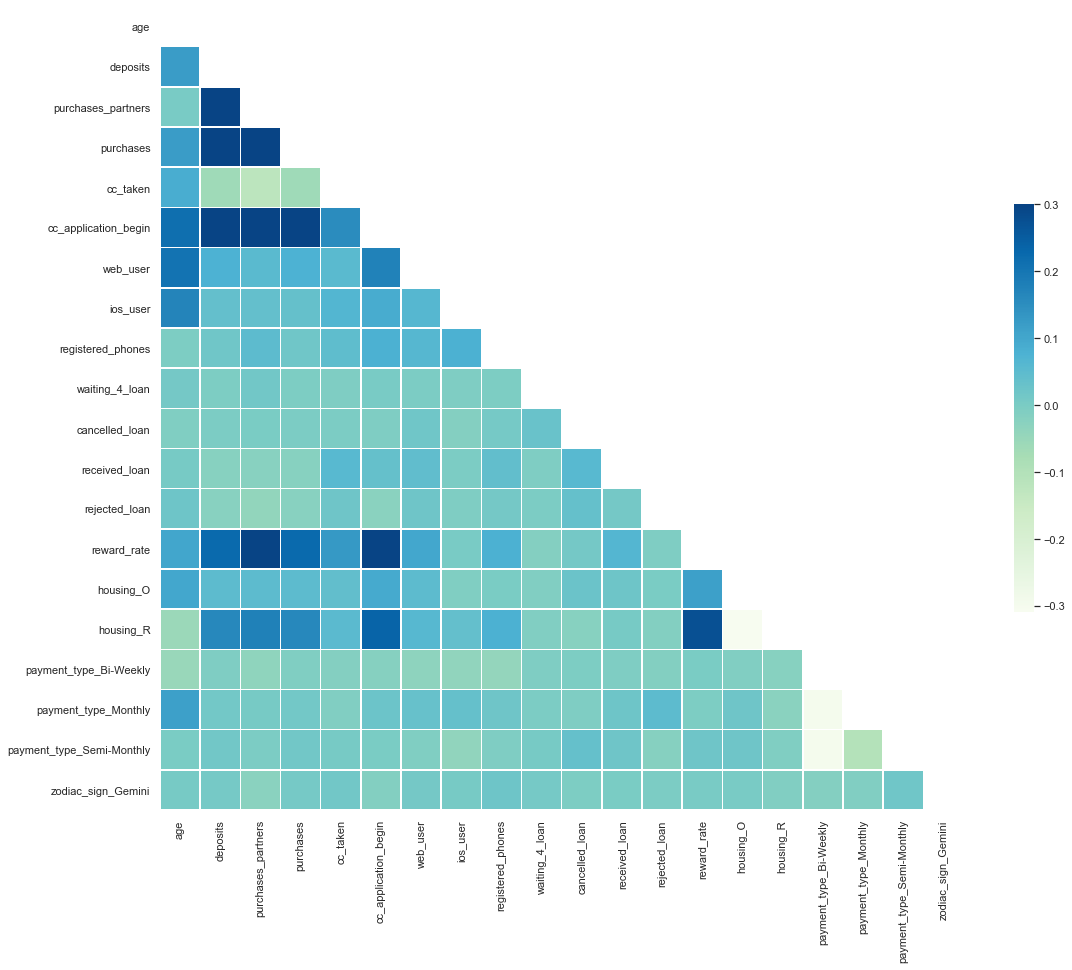

In [38]:
# New Correlation Matrix
sn.set(style="white")
corr = X_train[X_train.columns[rfe.support_]].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18, 15))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
sn.heatmap(corr, mask=mask, cmap='GnBu', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [39]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train) # using the selected columns after RFE

# Predicting Test Set
y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])

In [40]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)

print("Test Data Accuracy: %0.5f" % accuracy_score(y_test, y_pred));

Test Data Accuracy: 0.63670


In [41]:
print("Test Data Precision: %0.5f" % precision_score(y_test, y_pred)); # tp / (tp + fp)

Test Data Precision: 0.54284


In [42]:
print("Test Data Recall: %0.5f" % recall_score(y_test, y_pred)); # tp / (tp + fn)

Test Data Recall: 0.76054


In [43]:
print("Test Data F1: %0.5f" % f1_score(y_test, y_pred));

Test Data F1: 0.63351


Test Data Accuracy: 0.6367
SVM Accuracy: 0.653 (+/- 0.030)


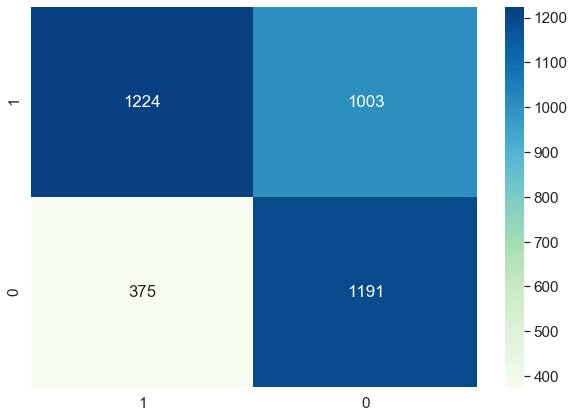

In [44]:
dataset_cm = pd.DataFrame(cm, index = (1, 0), columns = (1, 0))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(dataset_cm, cmap='GnBu', annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,
                             X = X_train[X_train.columns[rfe.support_]],
                             y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

<b>Insights:</b> All of our classification metrics are still within the same numbers as our test prior cross-validation and feature selection. The important aspect here is that we are able to validate and get the same results despite using only half of our original dataset, confirming the most of the predictive power lies on the retained dataset.

In [45]:
# Analyzing Coefficients - use post-rfe columns
pd.concat([pd.DataFrame(X_train[X_train.columns[rfe.support_]].columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.170831
1,deposits,0.220074
2,purchases_partners,-0.682988
3,purchases,-0.354072
4,cc_taken,0.071572
5,cc_application_begin,0.062618
6,web_user,0.120086
7,ios_user,0.077918
8,registered_phones,0.097624
9,waiting_4_loan,-0.048091


### Final Model

In [46]:
# Formatting Final Results
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)
final_results

,user,churn,predicted_churn
0,20839,0.0,1
1,15359,1.0,0
2,34210,1.0,0
3,57608,1.0,1
4,11790,0.0,0
...,...,...,...
3788,67681,0.0,1
3789,49145,1.0,0
3790,47206,0.0,0
3791,22377,0.0,0


### Overall Insights and Recommendation

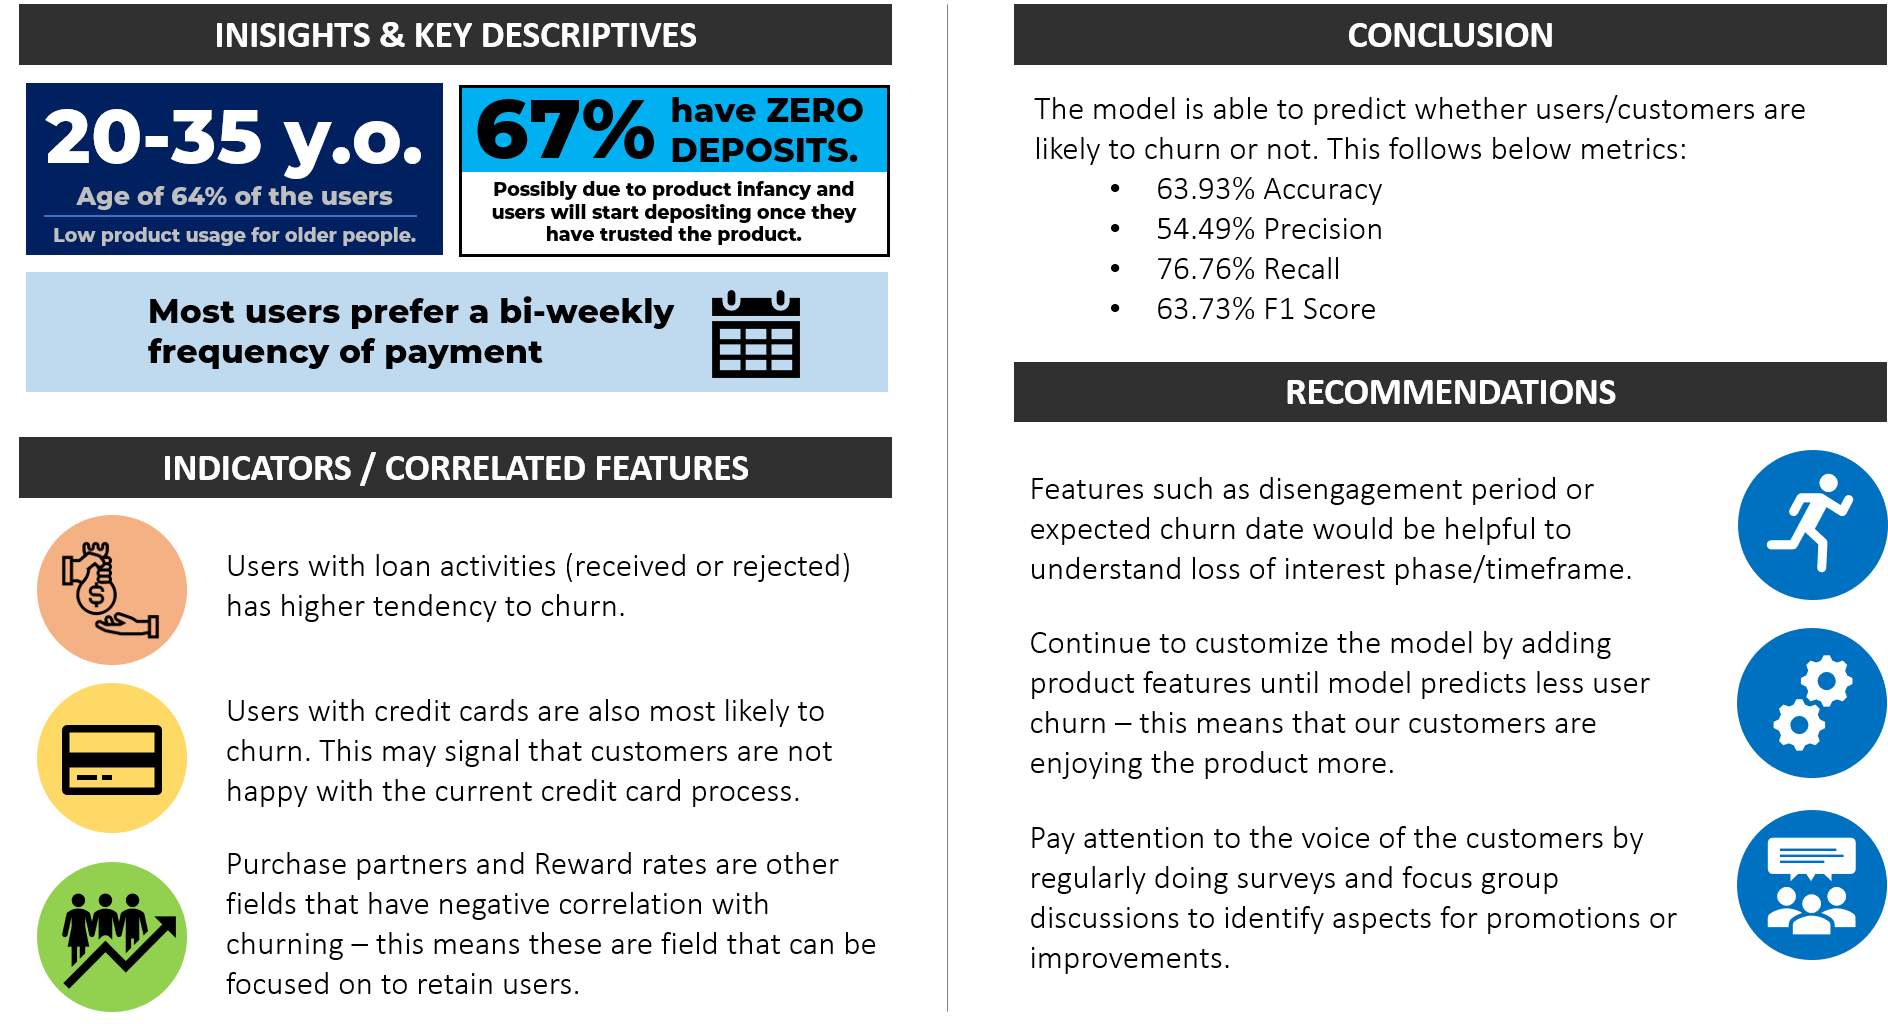